Data Dictionary:
- **Unnamed: 0**: Index column
- **MedInc**: Median income of households
- **HouseAge**: Median house age
- **AveRooms**: Average number of rooms per household
- **AveBedrms**: Average number of bedrooms per household
- **Population**: Total population
- **AveOccup**: Average household occupancy
- **Latitude**: Latitude of the location in cali
- **Longitude**: Longitude of the location in cali
- **MedianHouseValue**: Median house value for households



**Problem Statement:** A real estate brokerage needs to know the most important factors that determine house price.

**Data Science Problem:** Create a model that can predict the price of a house based the most important features of a house.

## Upload & Clean Data

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.linear_model import LinearRegression , Ridge
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score , mean_squared_error
from sklearn import tree



In [4]:
df = pd.read_csv('HousingPrices.csv')

In [5]:
df.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.shape

(20640, 10)

In [7]:
df.isnull().sum()

Unnamed: 0          0
MedInc              0
HouseAge            0
AveRooms            0
AveBedrms           0
Population          0
AveOccup            0
Latitude            0
Longitude           0
MedianHouseValue    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20640 non-null  int64  
 1   MedInc            20640 non-null  float64
 2   HouseAge          20640 non-null  float64
 3   AveRooms          20640 non-null  float64
 4   AveBedrms         20640 non-null  float64
 5   Population        20640 non-null  float64
 6   AveOccup          20640 non-null  float64
 7   Latitude          20640 non-null  float64
 8   Longitude         20640 non-null  float64
 9   MedianHouseValue  20640 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# EDA

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedianHouseValue'}>]], dtype=object)

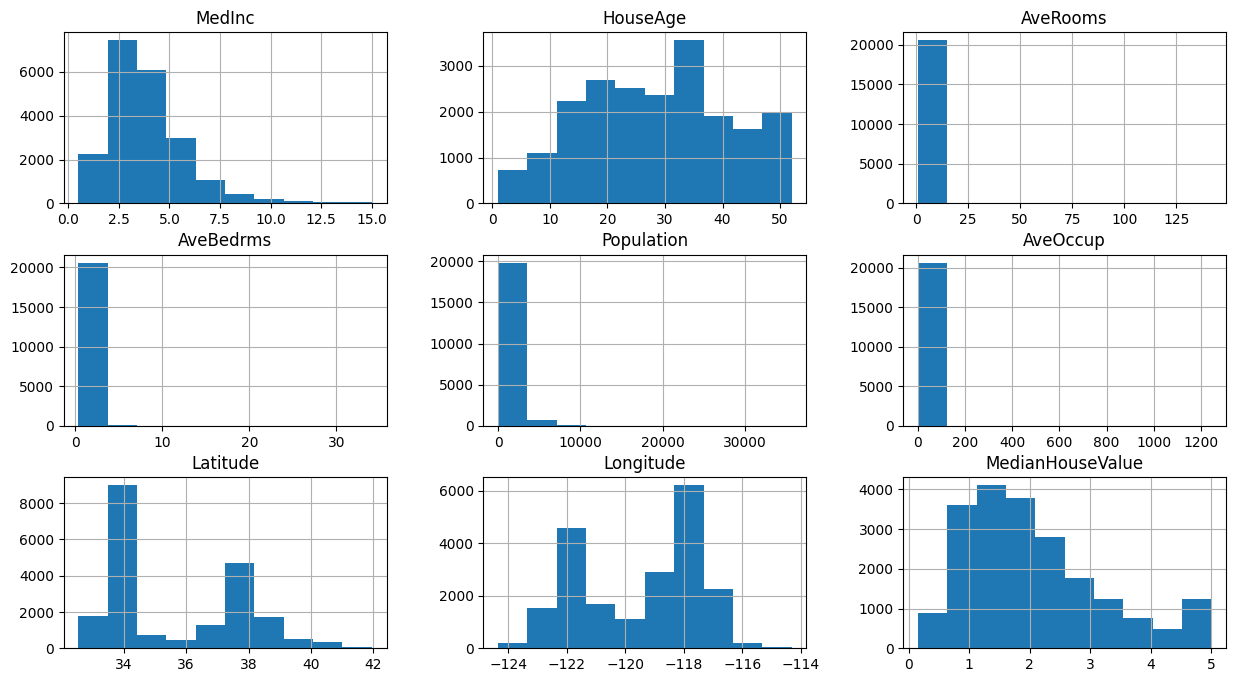

In [11]:
df.hist(figsize = (15,8))

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedianHouseValue'}>]], dtype=object)

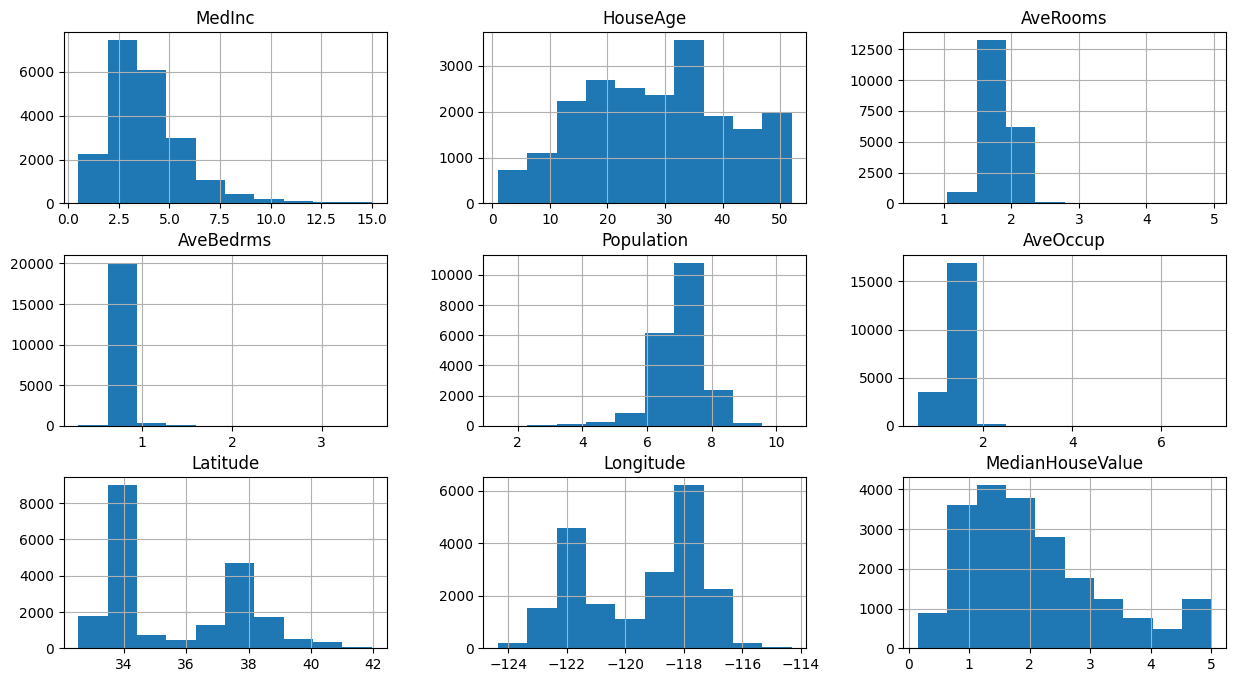

In [12]:
#Taking the log of the non normal features to  better examain them

df['AveRooms'] = np.log(df['AveRooms'] + 1)
df['AveBedrms'] = np.log(df['AveBedrms'] + 1)
df['Population'] = np.log(df['Population'] + 1)
df['AveOccup'] = np.log(df['AveOccup'] + 1)
df.hist(figsize = (15,8))

#now these look more normal

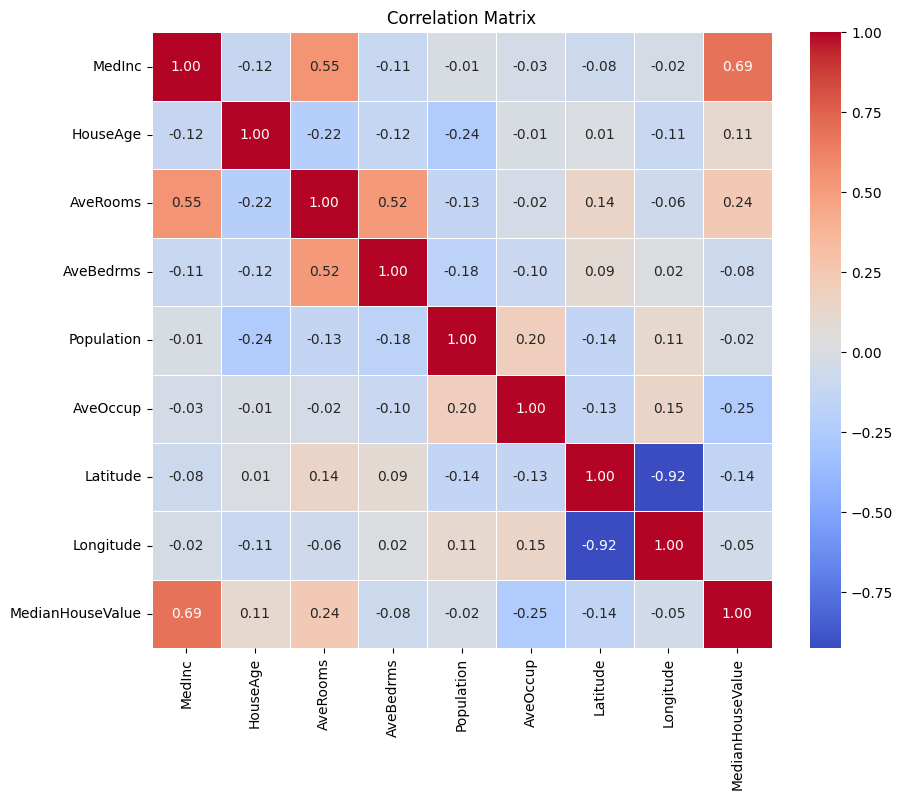

In [13]:
corr_df = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

#median income corrolates quite well with Median huse value, next is ave rooms

<Axes: xlabel='Latitude', ylabel='Longitude'>

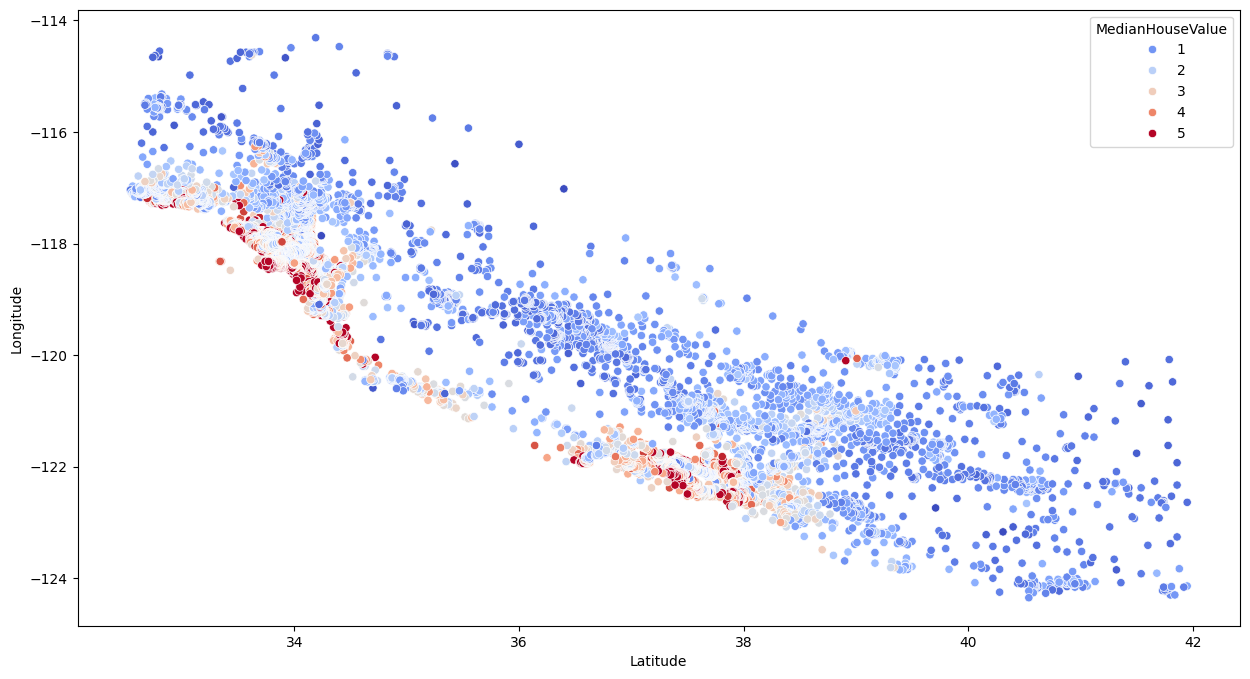

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(x ='Latitude', y = 'Longitude', data = df, hue = "MedianHouseValue", palette = "coolwarm")
# highest prices nect to water and big cities, create var for proximity city or water?
#top left is san diego and Las Angeles, the middle one is San Fransico bay.

In [15]:
#feature engineering
#df['BedrmRoomRatio'] = df['AveBedrms'] / df['AveRooms']
#df['PeoplePerRoom'] = df['AveRooms'] / df['AveOccup']

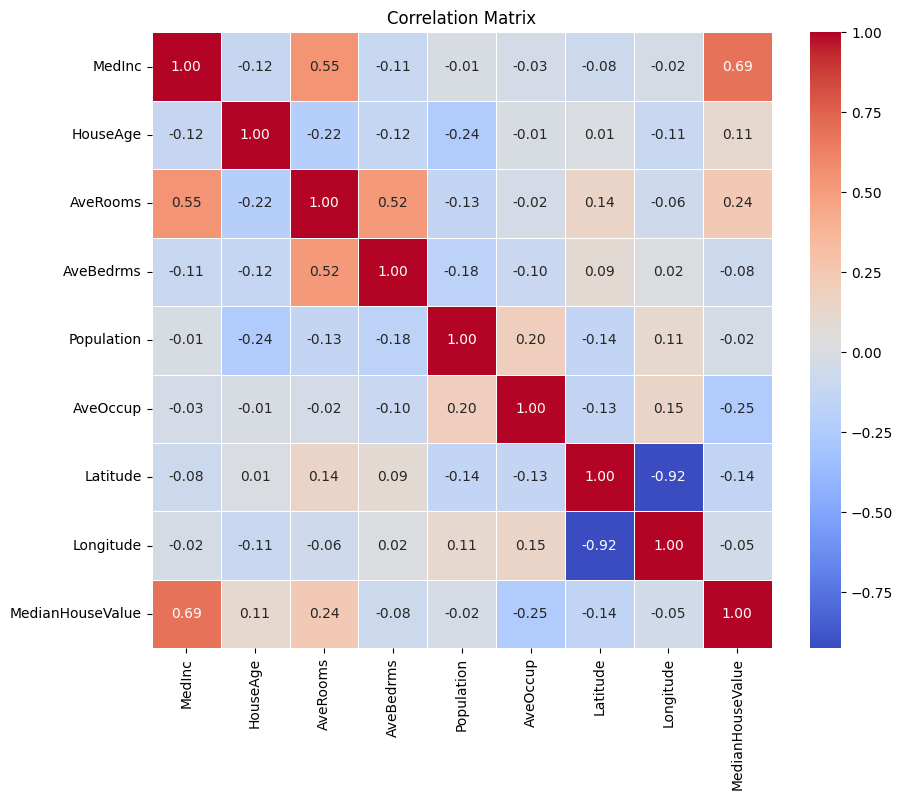

In [16]:
corr_df = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# Linear Regression Assumption Testing

In [17]:
X = df.drop(['MedianHouseValue'], axis = 1)
y = df['MedianHouseValue']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = LR.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

print("R^2 score:", LR.score(X_test, y_test))

Mean Squared Error: 0.46685378082757834
Root Mean Squared Error: 0.6832669908810013
R^2 score: 0.6437342932018937


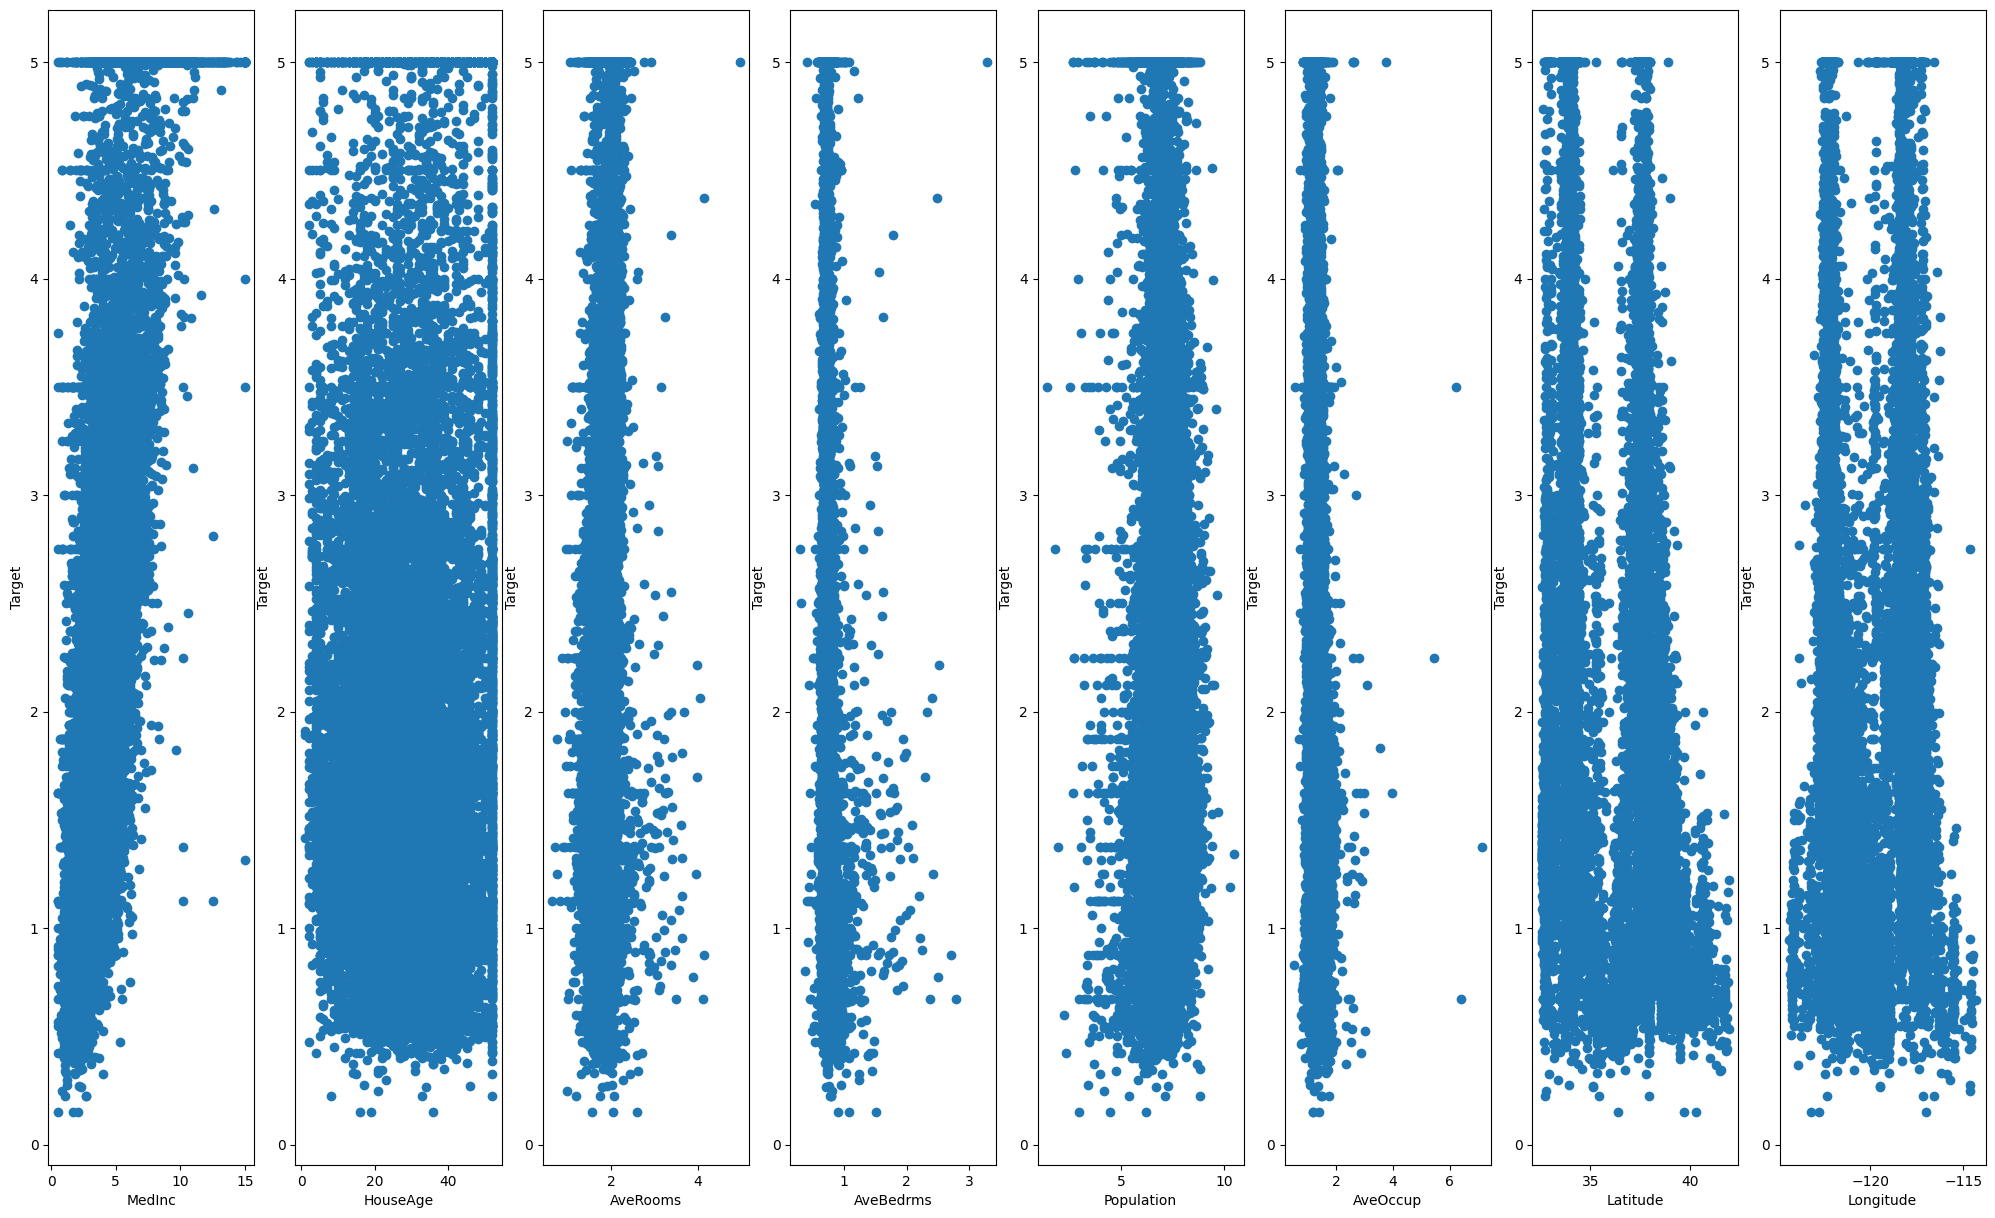

In [21]:
# 1. Linearity: Visual inspection of scatterplots
plt.figure(figsize=(25, 15))
for i, col in enumerate(X.columns):
    plt.subplot(1, len(X.columns), i + 1)
    plt.scatter(X_train[col], y_train)
    plt.xlabel(col)
    plt.ylabel('Target')
plt.show()

#mostly inear

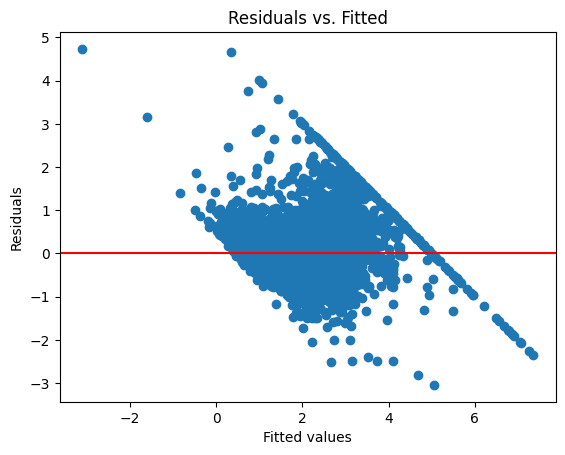

In [22]:
# 2. Independence of residuals: Residuals vs. Fitted plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

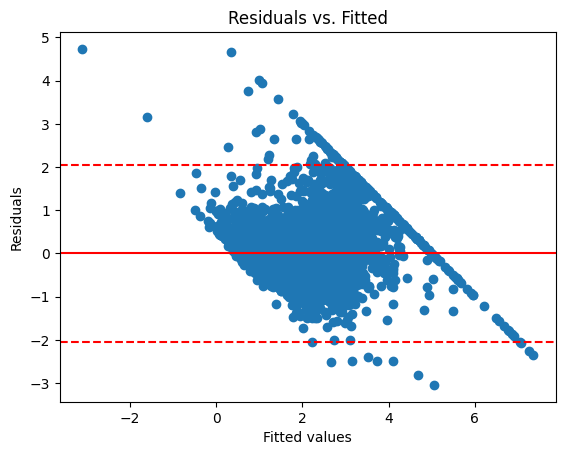

In [23]:
# 3. Homoscedasticity
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=3*np.std(residuals), color='r', linestyle='--')
plt.axhline(y=-3*np.std(residuals), color='r', linestyle='--')
plt.show()

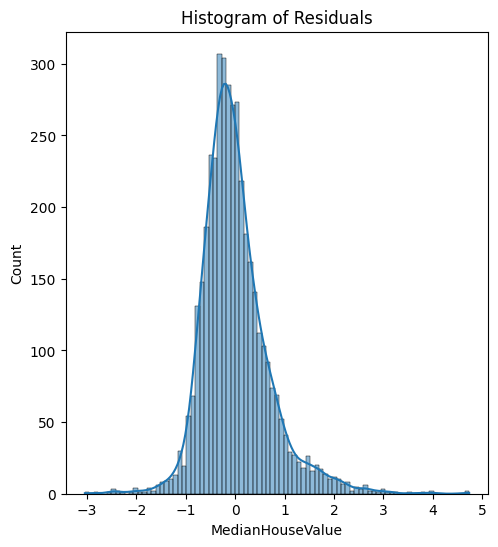

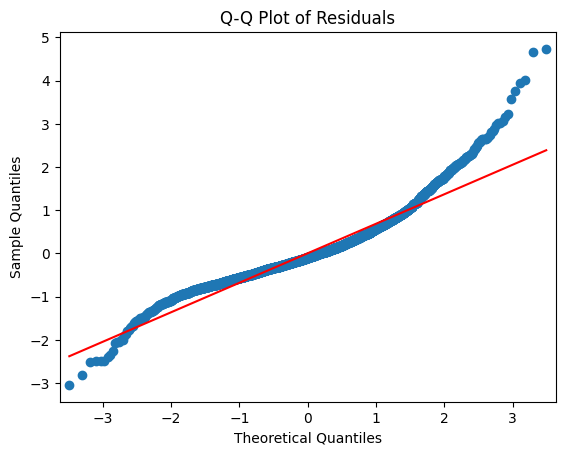

In [31]:
# 4. Normality of residuals: Histogram and Q-Q plot
plt.figure(figsize=(12, 6))
plt.subplot(1,2,2)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.subplot(1,2,2)
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [32]:
# 5. No multicollinearity: Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Add this line

X_train = sm.add_constant(X_train)  # Add constant term
vif = pd.DataFrame()
vif["Feature"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif)

#it appears that we have some issues witht the created features, we may have to do some PCA

      Feature           VIF
0       const  18533.691324
1      MedInc      2.570713
2    HouseAge      1.227026
3    AveRooms      3.327699
4   AveBedrms      2.071479
5  Population      1.185802
6    AveOccup      1.078281
7    Latitude      9.737679
8   Longitude      9.279806


In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dfx = pd.DataFrame(data = X_scaled, columns = df.columns[1:])

pca = PCA(n_components=None)
#using single value decomposition

dfx_pca = pca.fit(dfx)

dfx_pca

PCA()

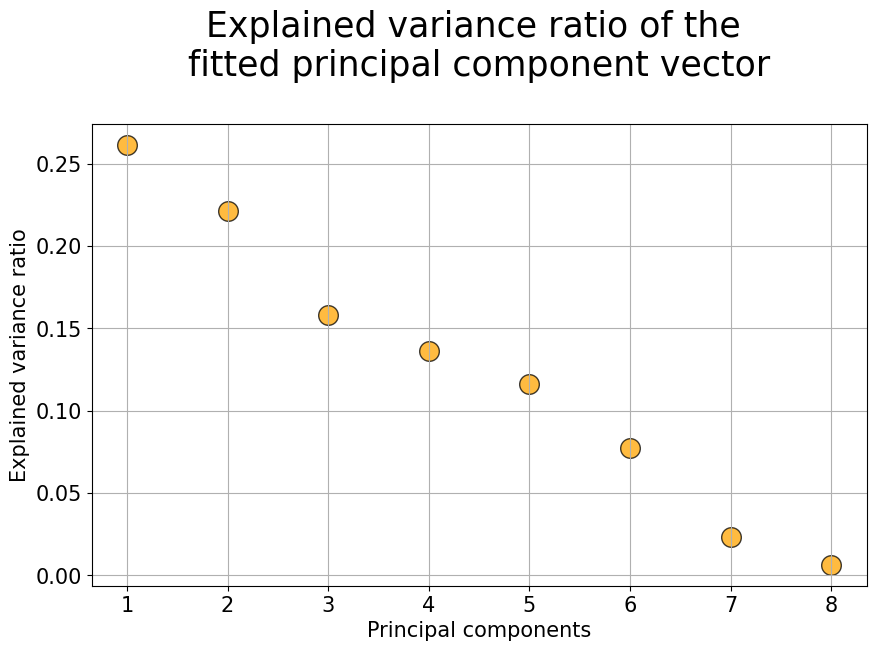

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [ ]:
df.to_csv('HousingPricesModel.csv', index=False)

# **Executive Summary: Exploratory Data Analysis of Housing Prices Dataset**
**Introduction**:

This report presents results of an EDA conducted on a dataset containing information on House Prices in the state of california. The analysis aims to uncover key insights and patterns in the data to help understand factors influencing Prices and inform business decisions.

**Data Overview:**

The dataset consists of 20640 observations and 9 variables. Variables include MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedianHouseValue    . There are no missing values in the dataset.

**Key Findings:**

MedInc was highly correlated right off the bat, as well as AvgRooms. This seems to point to size and area being very important to final house prices wich line up with initial hypoteses.

**Feature Engineering:**

Add Ocean and city Proximity as varriables, then i would highly suggest adding in square footage as a varriable in a future data set.

**Modeling Approach:**

Conducted Linear Regression As well as evaluated model assumptions. Later Lasso and ridge regression will be preformed as well as a randomforest

**Conclusion:**

Housing Prices are most likely explained by Median Income and Average Rooms.

-Recommendations: Create a decision tree and test that model. Or ensemble methods. Tune hyperparameters. Remove insignificant variables to test models performance.

-Further analysis: experiment with adding in BedRoomRatio, PeoplePerRoom, as well as OceanProximity.